# SMAP L_theta extraction test

## Import libraries

In [1]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings

## Some parameters

In [4]:
os.chdir(r'G:\Shared drives\Ryoko and Hilary\SMSigxSMAP')
pt_id = 0
in_path = "./analysis/1_data/SMAP/OZNET/Point-Example-SPL3SMP-E-005-results.csv"
# G:\Shared drives\Ryoko and Hilary\SMSigxSMAP\analysis\1_data\SMAP\OZNET\Point-Example-SPL3SMP-E-005-results.csv
network_name = 'OZNET'


## Read data

In [28]:

# precipitation = pd.read_csv(os.path.join(in_path, f'gldas_pcp_pt{pt_id}.csv'))
# precipitation['date'] = pd.to_datetime(precipitation['date'], format='%Y-%m-%dT%H:%M:%S')
# precipitation.set_index('date', inplace=True)

# print(precipitation.head())
# print(len(precipitation))

df_SMAP = pd.read_csv(in_path)
soilMoisture = df_SMAP[df_SMAP['ID'] == 0].copy()

# soilMoisture = pd.read_csv(os.path.join(in_path, f'smap_L4_pt{pt_id}.csv'))
soilMoisture['relative_soil_moisture'] = soilMoisture['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture']
soilMoisture['relative_soil_moisture'].fillna(-9999, inplace=True)
soilMoisture['date'] = pd.to_datetime(soilMoisture['Date'], format='%Y-%m-%dT%H:%M:%S')
soilMoisture.set_index('date', inplace=True)

bad_data_idx_smap = soilMoisture[soilMoisture['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_retrieval_qual_flag'] != 0.0].index
soilMoisture.drop(bad_data_idx_smap, inplace=True)
# df_ts_smap_am_daily = df_ts_smap_am['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture'].resample('D', axis=0).mean()

print(soilMoisture.head())
print(len(soilMoisture))

# noprecip = precipitation['first'] < 0.00002
# soilMoisture['noprecip'] = noprecip

           Category  ID  Latitude  Longitude        Date SMAP_Tile  \
date                                                                 
2015-03-31  Alabama   0 -35.32395   147.5348  2015-03-31    h00v00   
2015-04-01  Alabama   0 -35.32395   147.5348  2015-04-01    h00v00   
2015-04-06  Alabama   0 -35.32395   147.5348  2015-04-06    h00v00   
2015-04-08  Alabama   0 -35.32395   147.5348  2015-04-08    h00v00   
2015-04-09  Alabama   0 -35.32395   147.5348  2015-04-09    h00v00   

            SPL3SMP_E_005_Line_Y_9km  SPL3SMP_E_005_Sample_X_9km  \
date                                                               
2015-03-31                    1281.0                      3508.0   
2015-04-01                    1281.0                      3508.0   
2015-04-06                    1281.0                      3508.0   
2015-04-08                    1281.0                      3508.0   
2015-04-09                    1281.0                      3508.0   

            SPL3SMP_E_005_Soil_M

In [11]:

# soilMoisture = pd.read_csv(os.path.join(in_path, f'smap_L4_pt{pt_id}.csv'))
soilMoisture['relative_soil_moisture'] = soilMoisture['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture']
soilMoisture['date'] = pd.to_datetime(soilMoisture['Date'])
# soilMoisture['date'] = pd.to_datetime(soilMoisture['date'], format='%Y-%m-%dT%H:%M:%S')
soilMoisture.set_index('date', inplace=True)

bad_data_idx_smap = soilMoisture[soilMoisture['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_retrieval_qual_flag'] != 0.0].index
soilMoisture.drop(bad_data_idx_smap, inplace=True)
# soilMoisture = soilMoisture['SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture'].resample('D', axis=0).mean()

print(soilMoisture.head())
print(len(soilMoisture))

# noprecip = precipitation['first'] < 0.00002
# soilMoisture['noprecip'] = noprecip

           Category  ID  Latitude  Longitude        Date SMAP_Tile  \
date                                                                 
2015-03-31  Alabama   0 -35.32395   147.5348  2015-03-31    h00v00   
2015-04-01  Alabama   0 -35.32395   147.5348  2015-04-01    h00v00   
2015-04-06  Alabama   0 -35.32395   147.5348  2015-04-06    h00v00   
2015-04-08  Alabama   0 -35.32395   147.5348  2015-04-08    h00v00   
2015-04-09  Alabama   0 -35.32395   147.5348  2015-04-09    h00v00   

            SPL3SMP_E_005_Line_Y_9km  SPL3SMP_E_005_Sample_X_9km  \
date                                                               
2015-03-31                    1281.0                      3508.0   
2015-04-01                    1281.0                      3508.0   
2015-04-06                    1281.0                      3508.0   
2015-04-08                    1281.0                      3508.0   
2015-04-09                    1281.0                      3508.0   

            SPL3SMP_E_005_Soil_M

# Get drydown rates for no precipitation period

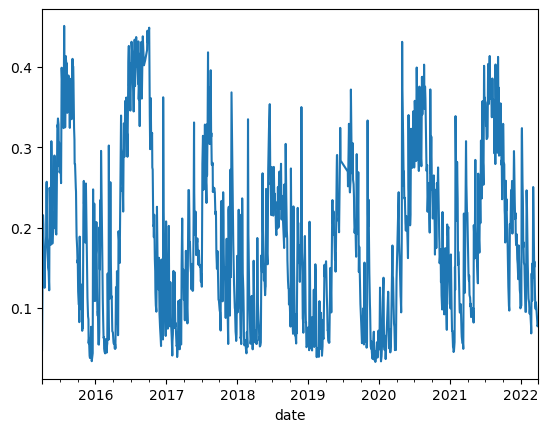

In [55]:
# soilMoisture = soilMoisture.resample('D').interpolate()
soilMoisture.relative_soil_moisture.plot()
soilMoisture.slope = pd.Series(np.gradient(soilMoisture.relative_soil_moisture), soilMoisture.index, name='slope')


# slope = pd.Series(np.gradient(tmp_.data), tmp_.index, name='slope')

# df = pd.concat([tmp_.rename('data'), slope], axis=1)
# df

<AxesSubplot: xlabel='date'>

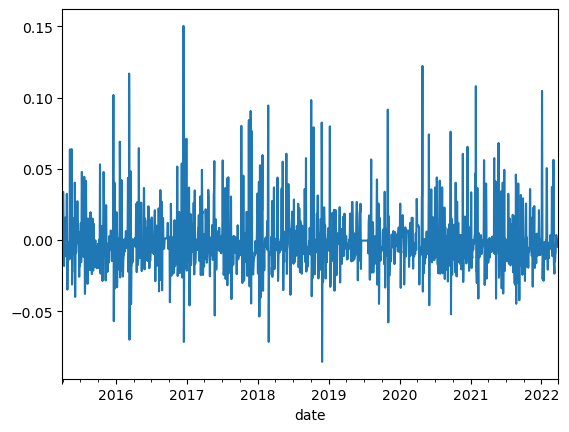

In [56]:
soilMoisture['dSdt'] = soilMoisture.slope
soilMoisture['dSdt'][soilMoisture['dSdt']>0] = np.nan
soilMoisture['dSdt(t+1)'] = soilMoisture['dSdt'].shift(periods=-1).copy()
soilMoisture[['relative_soil_moisture','dSdt(t+1)', 'dSdt']]


R:\Temp\ipykernel_14136\4280454599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soilMoisture['dSdt'][soilMoisture['dSdt']>0] = np.nan


,relative_soil_moisture,dSdt(t+1),dSdt
date,,,
2015-03-31,0.046070,NaN,NaN
2015-04-01,0.046524,NaN,NaN
2015-04-02,0.080337,NaN,NaN
2015-04-03,0.114150,NaN,NaN
2015-04-04,0.147964,NaN,NaN
...,...,...,...
2022-03-25,0.087001,-0.004857,-0.003641
2022-03-26,0.083360,-0.002652,-0.004857
2022-03-27,0.077287,NaN,-0.002652


# Plot the timesereis of data


In [49]:
# prep
# pt = json.loads(soilMoisture['.geo'].unique()[0])
# print(pt)
# lat = pt["coordinates"][1]
# lon = pt["coordinates"][0]

smap_color = '#ff7f0e'
precip_color = '#779eb2'

# title = f"{network_name}\n({lat:.2f}, {lon:.2f})"


##  Timeseries of data and Ltheta function

R:\Temp\ipykernel_14136\2315539170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soilMoisture['values_while_drydown'][drydown_period==False] = np.nan


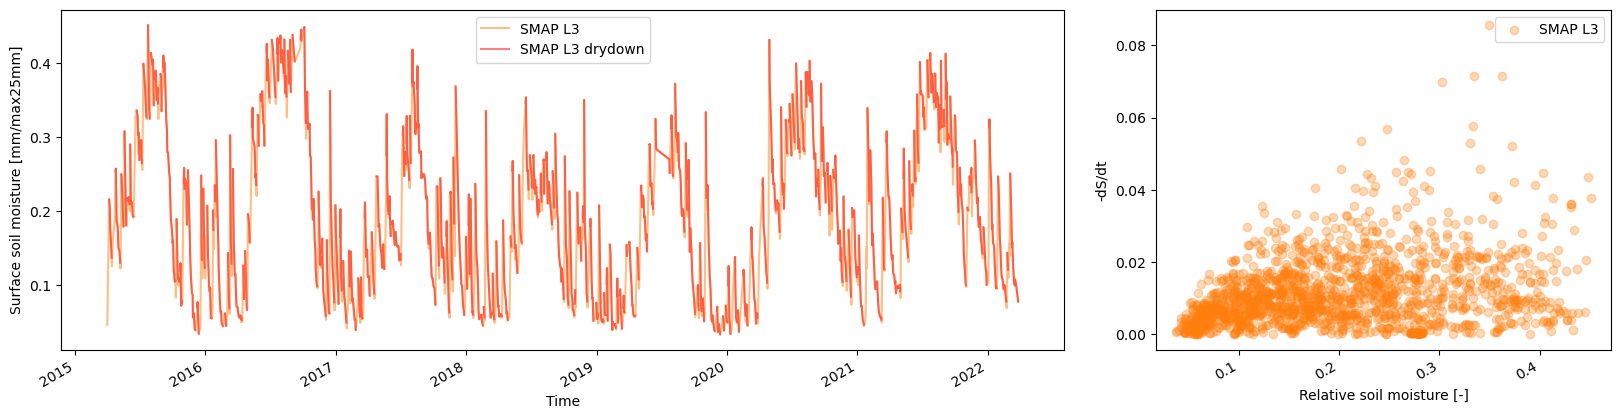

In [58]:

# Get drydown timeseries for plotting
soilMoisture['values_while_drydown'] = soilMoisture['relative_soil_moisture']
drydown_period = soilMoisture['dSdt(t+1)'].notna()
drydown_period = drydown_period.shift(periods=+1) | drydown_period
soilMoisture['values_while_drydown'][drydown_period==False] = np.nan
# noprecip_with_buffer = (soilMoisture['noprecip']==True) | (soilMoisture['noprecip'].shift(periods=-1)==True)
# soilMoisture['values_while_drydown'][noprecip_with_buffer==False] = np.nan

# SMAP timeseries 
fig = plt.figure(figsize=(20, 5))
# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))
ax1 = fig.add_subplot(1,3,(1,2))
line1, = ax1.plot(soilMoisture['relative_soil_moisture'], '-', markersize=4, alpha=0.5, label='SMAP L3', color=smap_color)
line2, = ax1.plot(soilMoisture['values_while_drydown'], '-', markersize=4, alpha=0.5, label='SMAP L3 drydown', color='red')
xax = ax1.xaxis
# ax1.set_title(title)
ax1.set_xlabel("Time")
# ax.set_ylabel("Volumetric soil water content [m^3/m^3]")
ax1.set_ylabel("Surface soil moisture [mm/max25mm]")
ax1.legend()

# # Precipitation
# ax2 =  fig.add_subplot(1,3,2)
# precipitation.plot.bar(y='first', ax=ax2, label='GLDAS', color=precip_color)
# ax2.set_title(title)
# ax2.set_xlabel("Time")
# ax2.set_ylabel("Precipitation [kg/m2]")
# ax2.legend()
# for ind, label in enumerate(ax2.get_xticklabels()):
#     if ind % 30 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
# # fig.savefig('../3_data_out/test_ts.png')


# sm = soilMoisture['first'][soilMoisture['noprecip']].values
# neg_dSdt = soilMoisture['dSdt(t+1)'][soilMoisture['noprecip']].values*-1

sm = soilMoisture['relative_soil_moisture'].values
neg_dSdt = soilMoisture['dSdt(t+1)'].values*-1


ax3 =  fig.add_subplot(1,3,3)
scatter = ax3.scatter(x=sm, y=neg_dSdt, marker='o', alpha=0.3, label='SMAP L3', color=smap_color)
xax = ax3.xaxis
# ax3.set_title(title)
ax3.set_xlabel("Relative soil moisture [-]")
ax3.set_ylabel("-dS/dt")
ax3.legend()

fig.autofmt_xdate()
# fig.savefig('../3_data_out/test_ts.png')


## Histogram for data check

Text(0, 0.5, 'Normalized frequency [-]')

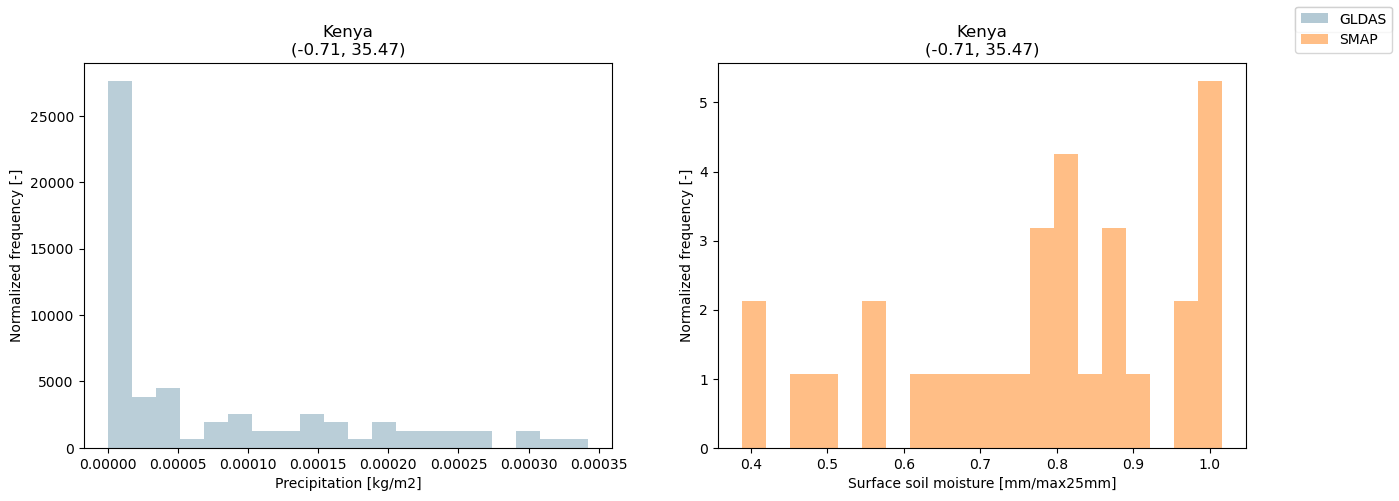

In [183]:
# SMAP timeseries 
fig = plt.figure(figsize=(15, 5))
# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))

# Plot the histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(precipitation['first'], label='GLDAS', bins=20, alpha = 0.5, density=True, stacked=True, color=precip_color)
fig.legend()
ax1.set_title(title)
ax1.set_xlabel("Precipitation [kg/m2]")
ax1.set_ylabel("Normalized frequency [-]")
# fig.savefig('../3_data_out/test_hist.png')

# Plot the histogram
ax2 = fig.add_subplot(1,2,2)
ax2.hist(soilMoisture['relative_soil_moisture'], label='SMAP', bins=20, alpha = 0.5, density=True, stacked=True, color=smap_color)
fig.legend()
ax2.set_title(title)
# ax.set_xlabel("Volmetric soil water content [m^3/m^3]")
ax2.set_xlabel("Surface soil moisture [mm/max25mm]")
ax2.set_ylabel("Normalized frequency [-]")

# fig.savefig('../3_data_out/test_hist.png')